### Building Intuition about Modularity

The goal of these in-class exercises is to build intuition about the modularity metric. Students will explore three special cases, based on the understanding that $ Q \in [-1/2, 1] $.

The special cases are
- $Q=0$
- $Q=-1/2$
- $Q=1$

---

Begin with some utilities. The first utility draws the graph, and allows the nodes to be set by the `node_color` parameter.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Literal, Hashable, Union,  Set
from numpy import linalg as linalg
from matplotlib.axes import Axes

####################################
## Create datatype that specifies ##
## the style of the graph display ##
####################################
PlotType = Literal[
    "GRAPHVIZ",
    "CIRCULAR",
    "SPRING",
    "DOT"
]

#################################
## Show graph with node labels ##
## in a chosen set of axes     ##
#################################
def show_graph(G: nx.Graph,
               title: str = "",
               labels: Union[dict[int, str], None] = None,
               axes: Union[None, Axes] = None,
               node_color: Union[None, list[str]] = None,
               plot_style: PlotType = "GRAPHVIZ"
               ) -> dict[Hashable, Tuple[float, float]]:
    if labels is None:
        labels = {node: str(node) for node in G.nodes()}
    if axes is None:
        plt.figure(figsize=(4,4))
        axes: Axes = plt.gca()
    if node_color is None:
        node_color = ['y' for _ in G.nodes]
    node_positions: dict[Hashable, tuple[float, float]] = dict()
    if plot_style == "GRAPHVIZ":
        node_positions = nx.nx_pydot.graphviz_layout(G,prog='neato')
    elif plot_style == "DOT":
        node_positions = nx.nx_pydot.graphviz_layout(G,prog='dot')
    elif plot_style == "SPRING":
        node_positions = nx.spring_layout(G)
    else:
        node_positions = nx.circular_layout(G)

    nx.draw(G, 
        node_positions, 
        node_color = node_color, 
        with_labels = True, 
        labels = labels,
        node_size = 300,
        ax=axes, 
        alpha=0.8)
    
    axes.set_title(title)
    axes.set_aspect('equal')

The second utility takes a partition and assigns colors to the nodes in the partition. The partition is a tuple of sets. 

In [16]:
def are_mutually_disjoint(sets: Tuple[Set, ...]) -> bool:
    """
        Take a tuple of sets and determine whether they are 
        mutually disjoint
    """
    for i in range(len(sets)):
        for j in range(i + 1, len(sets)):
            if sets[i] & sets[j]:  # Check for intersection
                return False
    return True

def groups_to_colors(G: nx.Graph,
                     partition: Tuple[Set, ...]
                     ) -> list[str]:
    """
        Assign all nodes in a given set the same color
        Returns a list of colors, one for each node in the graph
    """
    union_set: Set = set()
    for s in partition:
        union_set |= s
    if set(G) != union_set:
        raise ValueError("Union of sets in partition do not equal nodes in graph")
    if not are_mutually_disjoint(partition):
        raise ValueError("Sets in partition are not mutually disjoint")

    colors: list[str] = ['y', 'lightblue', 'violet', 'salmon', 
                         'aquamarine', 'lightpink', 'lightgray', 'linen']

    node_group_dict: dict[int, int] = {node: 0 for node in sorted(G.nodes())}
    for group_num in range(len(partition)):
        for node in partition[group_num]:
            node_group_dict[node] = group_num
    
    return [colors[node_group_dict[node]%len(colors)] for node in G.nodes()]

    


---

**Example Usage**

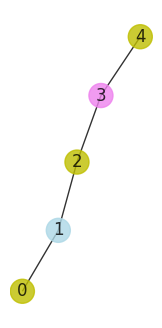

In [ ]:
G: nx.Graph = nx.path_graph(5)
partition: Tuple[Set[Hashable], ...] = ({0,2,4}, {1}, {3})
node_colors = groups_to_colors(G, partition)
show_graph(G, node_color=node_colors)

---

**Problem 1.** Create a graph and a partition of the nodes in the graph such that the modularity of the partition is 0. The graph must have 
- five or more vertices and
- two or more edges

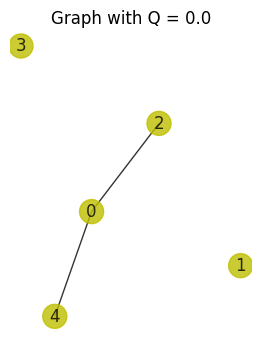

In [ ]:
# Build graph
G: nx.Graph = nx.Graph()
G.add_nodes_from({0, 1, 2, 3, 4})

# TODO: Add edges
G.add_edge()
G.add_edge()

# TODO: Define partition
partition: Tuple[Set[Hashable], ...] = ({},{})

# Show graph with partition
node_colors = groups_to_colors(G, partition)
title:str = f"Graph with Q = {np.round(nx.community.modularity(G, partition),2)}"
show_graph(G, node_color=node_colors, title=title)


---

**Problem 2.** Create a graph and a partition of the nodes in the graph such that the modularity of the partition is 0. The graph must have 
- five or more vertices
- two or more edges

The partition must include at least two sets.

In [ ]:
# Build graph
G: nx.Graph = nx.Graph()
G.add_nodes_from({0, 1, 2, 3, 4})

# TODO: Add edges
G.add_edge()
G.add_edge()

# TODO: Define partition
partition: Tuple[Set[Hashable], ...] = ({}, {})

# Show graph with partition
node_colors = groups_to_colors(G, partition)
title:str = f"Graph with Q = {np.round(nx.community.modularity(G, partition),2)}"
show_graph(G, node_color=node_colors, title=title)

---

**Problem 3.** Create a graph and a partition of the nodes in the graph such that the modularity of the partition is -1/2. The graph must have 
- five or more vertices
- two or more edges

The partition must include at least two sets.

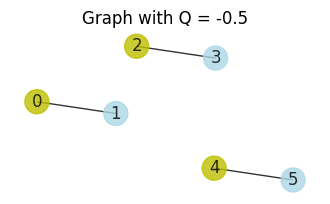

In [ ]:
# Build graph
G: nx.Graph = nx.Graph()
G.add_nodes_from({0, 1, 2, 3, 4, 5})

# TODO: Add edges
# TODO: Add edges
G.add_edge()
G.add_edge()

# TODO: Define partition
partition: Tuple[Set[Hashable], ...] = ({}, {})

# Show graph with partition
node_colors = groups_to_colors(G, partition)
title:str = f"Graph with Q = {np.round(nx.community.modularity(G, partition),2)}"
show_graph(G, node_color=node_colors, title=title)

---

**Problem 4.** Create a graph and a partition of the nodes in the graph such that the modularity of the partition is at least 0.75. The graph must have 
- twelve or more vertices
- two or more edges

The partition must include at least two sets.

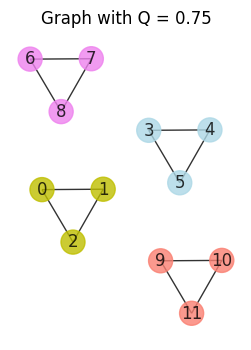

In [ ]:
# Build graph
G: nx.Graph = nx.Graph()
G.add_nodes_from({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11})

# TODO: Add edges
G.add_edge()
G.add_edge()

# TODO: Define partition
partition: Tuple[Set[Hashable], ...] = ({}, {})

# Show graph with partition
node_colors = groups_to_colors(G, partition)
title:str = f"Graph with Q = {np.round(nx.community.modularity(G, partition),2)}"
show_graph(G, node_color=node_colors, title=title)

---

**Problem 5.** Create a graph and a partition of the nodes in the graph such that the modularity of the partition is at least 0.95. The graph must have 
- 50 or more vertices
- 25 or more edges

The partition must include at least two sets.

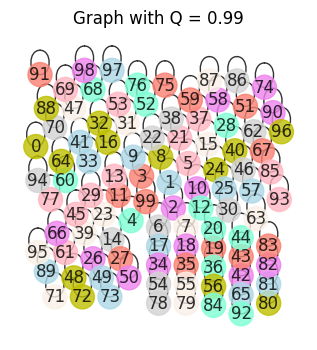

In [ ]:
# Build graph
G: nx.Graph = nx.Graph()
G.add_nodes_from(range(50))

# TODO: Add edges
G.add_edge()
G.add_edge()

# TODO: Define partition
partition: Tuple[Set[Hashable], ...] = ({}, {})

# Show graph with partition
node_colors = groups_to_colors(G, partition)
title:str = f"Graph with Q = {np.round(nx.community.modularity(G, partition),2)}"
show_graph(G, node_color=node_colors, title=title)